# Unsupervised Learning: k-Means Clustering

### Principal Components Analysis 
- PCA is an example of an unsupervised learning model that can be used for dimensionality reduction, regularization, etc.
- PCA learns an optimal rotation of the data in high-dimensional space to identify latent variables that have important properties: 
    * the latent variables are uncorrelated
    * the latent variables are orthogonal
    * the latent variables are ordered by the amount of variance accounted for. 
- The first property can be useful in further analysis (e.g., classifiers) especially when the number of observations is smaller than the number of variables. 
- The second property makes intepreting the latent variables challenging. 
- The third property is useful for selecting latent variables. 

### Clustering Algorithms 
- Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.
- The important point here is that the labels are not known in advance.  We are trying to learn
    * What are the statistically meaningful subsets of the data, that we can assign labels to. 
    * How many such such labels are optimal to model the data. 
    * properties that define each cluster to develop an interpretation of each cluster. 


In [34]:
import matplotlib.pyplot as plt
import numpy as np

## k-Means Clustering

### The *k*-means algorithm 
- searches for a predetermined number of clusters within an unlabeled multidimensional dataset.
- simple conception of what the optimal clustering looks like:
    - The *cluster center* is the arithmetic mean of all the points belonging to the cluster.
    - Each point is closer to its own cluster center than to other cluster centers.
- Those two assumptions are the basis of the *k*-means model.

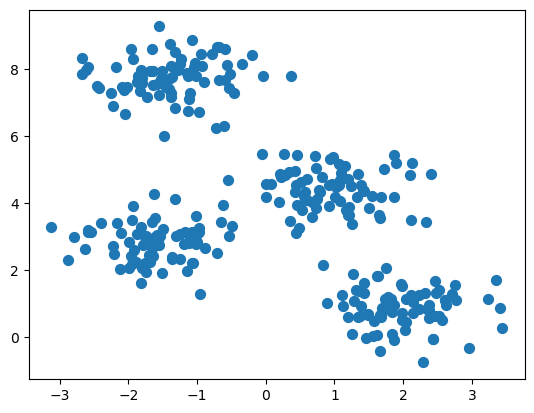

In [35]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

- By eye, it is relatively easy to pick out the four clusters.
- The *k*-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator syntax: 

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

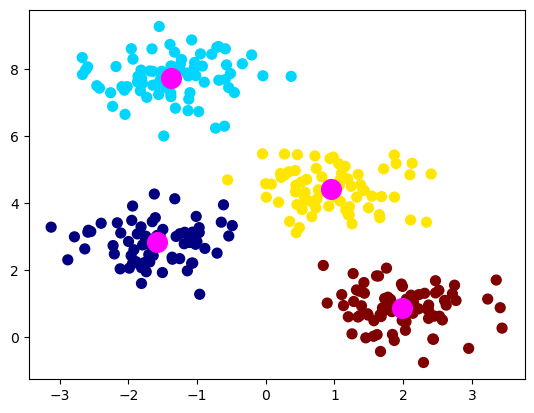

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='jet')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='magenta', s=200);

- the *k*-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye.
- the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly.
- the typical approach to *k*-means involves an intuitive iterative approach known as *expectation–maximization*.

### Expectation–Maximization
- Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science.
- *k*-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.
- In this case, the expectation–maximization approach here consists of the following procedure:

   1. Guess some cluster centers.   
   2. Repeat until converged:
      * *E-step*: Assign points to the nearest cluster center.
      * *M-step*: Set the cluster centers to the mean of their assigned points.

- Here the *E-step* or *expectation step* involves updating our expectation of which cluster each point belongs to.
- The *M-step* or *maximization step* involves maximizing some fitness function that defines the locations of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

- K-meanhierarchical clustering, are the most widely used clustering algorithm, but have serious weaknesses, largely because they are greedy. 
    - The globally optimal result may not be achieved
    - Although the E–M procedure is guaranteed to improve the result in each step, there is no assurance that it will lead to the *global* best solution.
    - The number of clusters must be selected beforehand -  it cannot learn the number of clusters from the data.

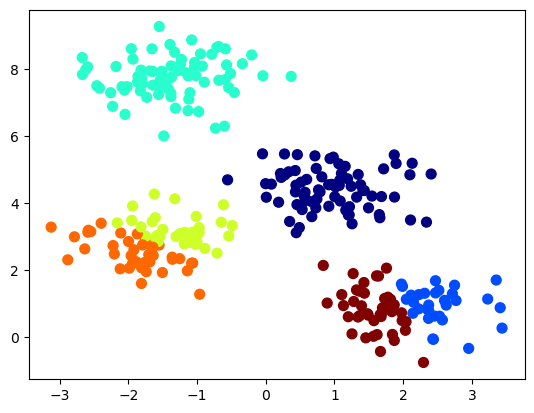

In [38]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='jet');

Digits 

In [39]:
#from sklearn.datasets import load_digits
#digits = load_digits()
#digits.keys()
from sklearn.datasets import fetch_openml
data, target = fetch_openml('mnist_784', version=1, return_X_y=True)
data = np.array(data)
target = np.array(target,dtype = 'int')

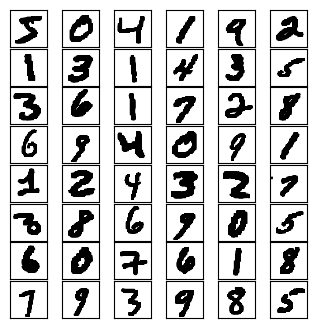

In [40]:
def plot_digits(data,rows,columns,size):
    fig, ax = plt.subplots(rows, columns, figsize=size,
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(28, 28), cmap='binary')
        im.set_clim(0, 16)
plot_digits(data,8,6,(4,4))

In [41]:
nc = 20
kmeans = KMeans(n_clusters=nc, random_state=1)
clusters = kmeans.fit_predict(data)
centers = kmeans.cluster_centers_

The result clusters are defined in a 784 dimensions.
Notice that the cluster centers themselves are 784-dimensional points, and can be interpreted as representing the "typical" digit within the cluster.
Let's see what these cluster centers look like (see the following figure):

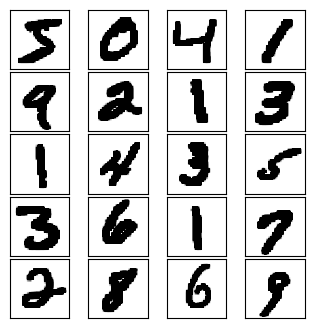

In [42]:
plot_digits(data,5,4,(4,4))

In [43]:
#In the present case I can evaluate the clusters, by assigning the elements of each cluster to the most common (mode) number found in the cluster. 
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(nc):
    mask = (clusters == i)
    labels[mask] = mode(target[mask])[0]

- k-means clustering performance in finding similar digits within the data:

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(target, labels)

0.7049

- With just a simple *k*-means algorithm, we discovered the correct grouping for the majority of the input digits. 

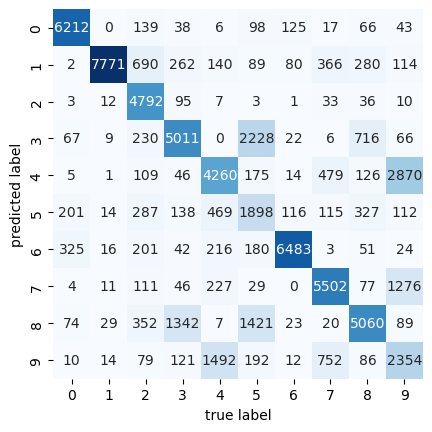

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
target_names = np.unique(target)
mat = confusion_matrix(target, labels)
sns.heatmap(mat.T, square=True, annot=True,fmt = "d",
            cbar=False, cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');